In [209]:
import yfinance as yf
import pandas as pd

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

# Calculate additional features for S&P 500 data
sp500_data['daily_return'] = sp500_data['Close'].pct_change() #might need
sp500_data['volatility'] = sp500_data['daily_return'].rolling(window=20).std()

###sp500_data['ma_200'] = sp500_data['Close'].rolling(window=200).mean() # for long term


# Calculate the 200-day moving return
sp500_data['200_day_return'] = sp500_data['Close'].pct_change(periods=200)

[*********************100%%**********************]  1 of 1 completed


In [210]:
sp500 = sp500_data.dropna()
sp500.head(20)

,Open,High,Low,Close,Adj Close,Volume,daily_return,volatility,200_day_return
Date,,,,,,,,,
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,1349.969971,1161500000,-0.017932,0.013576,-0.072326
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,1342.130005,1441700000,-0.005808,0.013576,-0.040938
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,1388.760010,1297900000,0.034743,0.016088,-0.009521
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,1396.930054,1177400000,0.005883,0.016181,-0.004646
2000-10-23,1396.930054,1406.959961,1387.750000,1395.780029,1395.780029,1046800000,-0.000823,0.016139,-0.031697
2000-10-24,1395.780029,1415.640015,1388.130005,1398.130005,1398.130005,1158600000,0.001684,0.016071,-0.040800
2000-10-25,1398.130005,1398.130005,1362.209961,1364.900024,1364.900024,1315600000,-0.023767,0.016862,-0.051204
2000-10-26,1364.900024,1372.719971,1337.810059,1364.439941,1364.439941,1303800000,-0.000337,0.015876,-0.047345
2000-10-27,1364.439941,1384.569946,1364.130005,1379.579956,1379.579956,1086300000,0.011096,0.015930,-0.048356


In [211]:
import pandas_datareader.data as pdr
import yfinance as yf
import pandas as pd

# Fetch economic indicators from FRED
gdp = pdr.get_data_fred('GDP', start='2000-01-01', end='2024-01-01') #quaterly

inflation = pdr.get_data_fred('CPIAUCSL', start='2000-01-01', end='2024-01-01')  # CPI for inflation
unemployment = pdr.get_data_fred('UNRATE', start='2000-01-01', end='2024-01-01')
interest_rate = pdr.get_data_fred('FEDFUNDS', start='2000-01-01', end='2024-01-01')

# Rename columns for clarity
gdp.rename(columns={'GDP': 'GDP'}, inplace=True)
inflation.rename(columns={'CPIAUCSL': 'Inflation'}, inplace=True)
unemployment.rename(columns={'UNRATE': 'Unemployment'}, inplace=True)
interest_rate.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)

In [212]:
GDP = gdp.resample('D').ffill()
GDP.loc['2020-03-28':'2020-04-01'] 

,GDP
DATE,
2020-03-28,21706.513
2020-03-29,21706.513
2020-03-30,21706.513
2020-03-31,21706.513
2020-04-01,19913.143


In [213]:
Inflation = inflation.resample('D').ffill()
Unemployment = unemployment.resample('D').ffill()
Interest_rate = interest_rate.resample('D').ffill()

In [177]:
merged_data = sp500.join([Inflation, Unemployment, Interest_rate], how='left')



merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,volatility,200_day_return,Inflation,Unemployment,Interest_Rate
Date,,,,,,,,,,,,
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,1349.969971,1.161500e+09,-0.017932,0.013576,-0.072326,173.9,3.9,6.51
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,1342.130005,1.441700e+09,-0.005808,0.013576,-0.040938,173.9,3.9,6.51
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,1388.760010,1.297900e+09,0.034743,0.016088,-0.009521,173.9,3.9,6.51
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,1396.930054,1.177400e+09,0.005883,0.016181,-0.004646,173.9,3.9,6.51
2000-10-23,1396.930054,1406.959961,1387.750000,1395.780029,1395.780029,1.046800e+09,-0.000823,0.016139,-0.031697,173.9,3.9,6.51


Method 1

We use top 5 companies in US.


Apple, Microsoft, Amazon, Google, NVIDIA

Method 2

If we include some independent company as our feature, we avoid adding bias but also we are adding a feature that demonstrates the market state.

KKR,
Dell Technologies,	
Veeva Systems	

METHOD 1 :final_data





In [22]:
#notice the Close range for differ stocks 
# google has data only from 2004-08-19

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

# Dictionary to store close price dataframes
close_prices = {}

# Fetch historical data for each ticker and extract the close prices
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data = stock.history(start='2004-08-19', end='2024-01-01')
    close_prices[ticker] = data[['Close']].rename(columns={'Close': ticker})

# Combine all close price dataframes into a single dataframe
combined_close_prices = pd.concat(close_prices.values(), axis=1)
combined_close_prices.head()



,AAPL,MSFT,AMZN,GOOGL,NVDA
Date,,,,,
2004-08-19 00:00:00-04:00,0.463640,16.900316,1.9315,2.508132,0.089124
2004-08-20 00:00:00-04:00,0.464999,16.950171,1.9755,2.707353,0.094398
2004-08-23 00:00:00-04:00,0.469226,17.025167,1.9725,2.734599,0.096462
2004-08-24 00:00:00-04:00,0.482361,17.025167,1.9525,2.621365,0.092869
2004-08-25 00:00:00-04:00,0.498968,17.218922,2.0150,2.649612,0.096844


In [44]:
#change the date index of combined_close_prices to timezone-naive
combined_close_prices.index = combined_close_prices.index.tz_localize(None)
merged_data = merged_data.loc['2004-08-19':]

final_data = merged_data.join(combined_close_prices, how='inner')

final_data.head()


,Open,High,Low,Close,Adj Close,Volume,daily_return,volatility,200_day_return,Inflation,Unemployment,Interest_Rate,AAPL,MSFT,AMZN,GOOGL,NVDA
Date,,,,,,,,,,,,,,,,,
2004-08-19,1095.170044,1095.170044,1086.280029,1091.229980,1091.229980,1.249400e+09,-0.003598,0.008767,0.038564,189.2,5.4,1.43,0.463640,16.900316,1.9315,2.508132,0.089124
2004-08-20,1091.229980,1100.260010,1089.569946,1098.349976,1098.349976,1.199900e+09,0.006525,0.008592,0.037138,189.2,5.4,1.43,0.464999,16.950171,1.9755,2.707353,0.094398
2004-08-23,1098.349976,1101.400024,1094.729980,1095.680054,1095.680054,1.021900e+09,-0.002431,0.008600,0.040285,189.2,5.4,1.43,0.469226,17.025167,1.9725,2.734599,0.096462
2004-08-24,1095.680054,1100.939941,1092.819946,1096.189941,1096.189941,1.092500e+09,0.000465,0.008314,0.042194,189.2,5.4,1.43,0.482361,17.025167,1.9525,2.621365,0.092869
2004-08-25,1096.189941,1106.290039,1093.239990,1104.959961,1104.959961,1.192200e+09,0.008000,0.008500,0.044336,189.2,5.4,1.43,0.498968,17.218922,2.0150,2.649612,0.096844


METHOD 2 :final_data too 





In [75]:
#KKR has data only from 2010-07-15--should also change it ones before 

tickers = ['KKR', 'DELL', 'VEEV']
# Dictionary to store close price dataframes
close_prices = {}

# Fetch historical data for each ticker and extract the close prices
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data = stock.history(start='2010-07-15', end='2024-01-01')
    close_prices[ticker] = data[['Close']].rename(columns={'Close': ticker})

combined_close_prices = combined_close_prices.ffill()

combined_close_prices.head()

,KKR,DELL,VEEV
Date,,,
2010-07-15,5.904121,11.303946,37.16
2010-07-16,5.608915,11.303946,37.16
2010-07-19,5.666799,11.303946,37.16
2010-07-20,5.354227,11.303946,37.16
2010-07-21,5.093751,11.303946,37.16


In [76]:
#change the date index of combined_close_prices to timezone-naive
combined_close_prices.index = combined_close_prices.index.tz_localize(None)
merged_data = merged_data.loc['2010-07-15':]

final_data = merged_data.join(combined_close_prices, how='inner')

final_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,volatility,200_day_return,Inflation,Unemployment,Interest_Rate,KKR,DELL,VEEV
Date,,,,,,,,,,,,,,,
2010-07-15,1094.459961,1098.660034,1080.530029,1096.479980,1096.479980,4.552470e+09,0.001196,0.012680,0.031515,217.605,9.4,0.18,5.904121,11.303946,37.16
2010-07-16,1093.849976,1093.849976,1063.319946,1064.880005,1064.880005,5.297350e+09,-0.028819,0.014131,0.004026,217.605,9.4,0.18,5.608915,11.303946,37.16
2010-07-19,1066.849976,1074.699951,1061.109985,1071.250000,1071.250000,4.089500e+09,0.005982,0.014231,0.013405,217.605,9.4,0.18,5.666799,11.303946,37.16
2010-07-20,1064.530029,1083.939941,1056.880005,1083.479980,1083.479980,4.713280e+09,0.011417,0.014533,0.052076,217.605,9.4,0.18,5.354227,11.303946,37.16
2010-07-21,1086.670044,1088.959961,1065.250000,1069.589966,1069.589966,4.747180e+09,-0.012820,0.014376,0.043289,217.605,9.4,0.18,5.093751,11.303946,37.16


In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# y
y = np.where(final_data['Close'].shift(-1) > merged_data['Close'], 1, -1)#explain: if the next day's close price is higher than the current day's close price, the model should predict a 1, otherwise, it should predict a -1.
# feature
X = final_data.drop(columns=['Close', 'daily_return', '200_day_return']).shift(1)


y = y[:-1]
X = X.dropna()


y = y[-len(X):]

# Check the shape of 'y' and 'X'
print(y.shape, X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)
# Calculate the accuracy score
accuracy = model.score(X_test, y_test)
print(f'Out-of-Sample Accuracy: {accuracy}')


###not improved much 

(3388,) (3388, 12)
              precision    recall  f1-score   support

          -1       0.47      0.45      0.46       308
           1       0.56      0.57      0.56       370

    accuracy                           0.52       678
   macro avg       0.51      0.51      0.51       678
weighted avg       0.52      0.52      0.52       678

Out-of-Sample Accuracy: 0.5176991150442478


In [78]:
# SVM model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a StandardScaler() object
scaler = StandardScaler()


# Create an instance of SVM
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma=0.1))

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          -1       0.62      0.13      0.21       308
           1       0.56      0.93      0.70       370

    accuracy                           0.57       678
   macro avg       0.59      0.53      0.46       678
weighted avg       0.59      0.57      0.48       678



In [80]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
# accuracy


Mean Squared Error: 0.9934119325120795
R2 Score: -0.001789160198496731


In [81]:
# lstm with keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=10, shuffle=False)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate the mean squared error

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# accuracy
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')



/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9977
Epoch 2/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9937
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9932
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9930
Epoch 5/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.9928
Epoch 6/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9926
Epoch 7/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9925
Epoch 8/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9924
Epoch 9/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9923
Epoch 10/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9922
Epoch 11/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9921
Epoch 12/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9921
Epoch 13/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9920
Epoch 14/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9919
Epoch 15/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 

In [159]:
import yfinance as yf
import pandas as pd

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

# Calculate additional features for S&P 500 data
sp500_data['daily_return'] = sp500_data['Close'].pct_change() #might need

merged_data=sp500_data
#convert the index to Date column
merged_data.reset_index(inplace=True)
# 将日期列转换为字符串以避免后续处理问题
merged_data['Date'] = merged_data['Date'].astype(str)


#get data from 2023-01-01 to 2024-01-01
merged_data = merged_data.loc[merged_data['Date'] >= '2023-01-01']
merged_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
5787,2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000,-0.004001
5788,2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000,0.007539
5789,2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000,-0.011646
5790,2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000,0.022841
5791,2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000,-0.000768


In [160]:

from sklearn.model_selection import train_test_split
#split my data into train and test and validate
#70% train, 15% test, 15% validate

# 创建训练集和临时集（测试集和验证集）
train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)

# 创建测试集和验证集
test_data, validate_data = train_test_split(temp_data, test_size=0.5, random_state=42)




# Check the sizes of the splits
print(f"Train data: {len(train_data)} rows")
print(f"Test data: {len(test_data)} rows")
print(f"Validate data: {len(validate_data)} rows")

Train data: 175 rows
Test data: 37 rows
Validate data: 38 rows


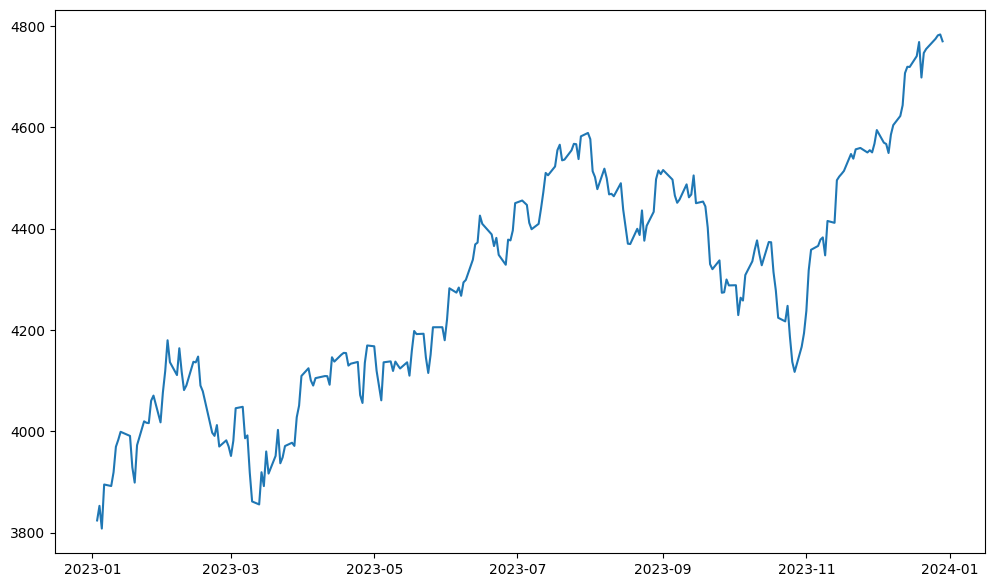

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 24))
plt.subplot(3, 1, 1)
plt.plot(merged_data.Date, merged_data.Close)

In [163]:
# Standardize the data
scaler = StandardScaler()
train_data_std = scaler.fit_transform(np.array(train_data['Close']).reshape(-1, 1))#reshape the data to 2D array
test_data_std = scaler.transform(np.array(test_data['Close']).reshape(-1, 1))
validate_data_std = scaler.transform(np.array(validate_data['Close']).reshape(-1, 1))


# 准备移位数据
def create_shifted_data(data, shift=1):
    X = data[:-shift]
    y = data[shift:]
    return X, y

train_X, train_y = create_shifted_data(train_data_std)
validate_X, validate_y = create_shifted_data(validate_data_std)


# 重塑数据以适应LSTM的输入
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validate_X = validate_X.reshape((validate_X.shape[0], 1, validate_X.shape[1]))




In [165]:
params = {
    'train_batch_size': 32,  # 训练批次大小
    'epochs': 250,  # 训练轮次
    'output_path': 'output/',  # 输出路径
    'learning_rate': 0.03,  # 初始学习率
    'lr_decay_rate': 0.8,  # 学习率衰减率
    'num_of_decay_per_epoch': 6  # 每个 epoch 中进行学习率衰减的次数
}

train_batch_size = params['train_batch_size']
epochs = params['epochs']
output_path = params['output_path']
learning_rate = params['learning_rate']
lr_decay_rate = params['lr_decay_rate']
num_of_decay_per_epoch = params['num_of_decay_per_epoch']


<!-- We create for sp500
Then we use same features for  -->

In [166]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import math

# Assuming learning_rate, epochs, num_of_decay_per_epoch, and lr_decay_rate are already defined

# Building the LSTM neural network
model = Sequential()
model.add(LSTM(input_shape=(1, 1), units=128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

# Specifying the learning rate decay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=math.floor(epochs / num_of_decay_per_epoch),
    decay_rate=lr_decay_rate
)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mean_squared_error']
)

model.summary()


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,025 (457.13 KB)

 Trainable params: 117,025 (457.13 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
# Train the model (assuming training data is available)
model.fit(train_data_std, train_data_std, epochs=epochs, batch_size=32)

# Make predictions on the validation data
validate_data_pred = model.predict(validate_data_std)

Epoch 1/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.8231 - mean_squared_error: 0.8231
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5125 - mean_squared_error: 0.5125
Epoch 3/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 4/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 5/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0487 - mean_squared_error: 0.0487
Epoch 6/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 7/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 8/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 9/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 10/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 11/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 

KeyboardInterrupt: 

In [157]:
import numpy as np


validate_data_Y = np.array(validate_data['Close']).reshape(-1, 1)

# Assuming validate_data_pred and validate_data_Y are already defined
# Calculate RMSE (Root Mean Squared Error)
RMSE = np.sqrt(np.mean((validate_data_pred - validate_data_Y) ** 2))

# Calculate MAE (Mean Absolute Error)
MAE = np.mean(np.abs(validate_data_pred - validate_data_Y))

# Calculate MAPE (Mean Absolute Percentage Error)
MAPE = np.mean(np.abs((validate_data_pred - validate_data_Y) / validate_data_Y)) * 100

# Print the error metrics
print("RMSE:", RMSE)
print("MAE:", MAE)
print("MAPE:", MAPE)


RMSE: 4357.184643347862
MAE: 4352.473239759767
MAPE: 99.99226186007863


In [178]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math



# 创建训练集和临时集（测试集和验证集）
train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)

# 创建测试集和验证集
test_data, validate_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# 标准化数据
scaler = StandardScaler()
train_data_std = scaler.fit_transform(np.array(train_data['Close']).reshape(-1, 1))
test_data_std = scaler.transform(np.array(test_data['Close']).reshape(-1, 1))
validate_data_std = scaler.transform(np.array(validate_data['Close']).reshape(-1, 1))

# 准备移位数据
def create_shifted_data(data, shift=1):
    X = data[:-shift]
    y = data[shift:]
    return X, y

train_X, train_y = create_shifted_data(train_data_std)
validate_X, validate_y = create_shifted_data(validate_data_std)

# 重塑数据以适应LSTM的输入
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validate_X = validate_X.reshape((validate_X.shape[0], 1, validate_X.shape[1]))

# 构建LSTM神经网络
model = Sequential()
model.add(LSTM(input_shape=(1, train_X.shape[2]), units=128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

# 指定指数衰减的学习率
learning_rate = 0.03
epochs = 250
num_of_decay_per_epoch = 6
lr_decay_rate = 0.8

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=math.floor(epochs / num_of_decay_per_epoch),
    decay_rate=lr_decay_rate
)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mean_squared_error']
)

# 训练模型
model.fit(train_X, train_y, epochs=epochs, batch_size=32)

# 预测验证集
validate_data_pred = model.predict(validate_X)

# 将预测值逆标准化
validate_data_pred_inv = scaler.inverse_transform(validate_data_pred)
validate_data_y_inv = scaler.inverse_transform(validate_y)

# 计算误差指标
RMSE = np.sqrt(np.mean((validate_data_pred_inv - validate_data_y_inv) ** 2))
MAE = np.mean(np.abs(validate_data_pred_inv - validate_data_y_inv))
MAPE = np.mean(np.abs((validate_data_pred_inv - validate_data_y_inv) / validate_data_y_inv)) * 100

# 打印误差指标
print("RMSE:", RMSE)
print("MAE:", MAE)
print("MAPE:", MAPE)


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.0370 - mean_squared_error: 1.0370
Epoch 2/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9845 - mean_squared_error: 0.9845
Epoch 3/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.9879 - mean_squared_error: 0.9879
Epoch 4/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.0180 - mean_squared_error: 1.0180
Epoch 5/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.9937 - mean_squared_error: 0.9937
Epoch 6/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9871 - mean_squared_error: 0.9871
Epoch 7/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.0124 - mean_squared_error: 1.0124
Epoch 8/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.9868 - mean_squared_error: 0.9868
Epoch 9/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.9993 - mean_squared_error: 0.9993
Epoch 10/250
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9967 - mean_squared_error: 0.9967
Epoch 11/250
128/12

In [ ]:
Tried: Data with GPD and unemployment rate, inflation.....make the model more inaccurate, bigger RMSE, MAE, MAPE

In [180]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math



# 创建训练集和临时集（测试集和验证集）
train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)

# 创建测试集和验证集
test_data, validate_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# 标准化数据
scaler = StandardScaler()
train_data_std = scaler.fit_transform(np.array(train_data['Close']).reshape(-1, 1))
test_data_std = scaler.transform(np.array(test_data['Close']).reshape(-1, 1))
validate_data_std = scaler.transform(np.array(validate_data['Close']).reshape(-1, 1))

# 准备移位数据
def create_shifted_data(data, shift=1):
    X = data[:-shift]
    y = data[shift:]
    return X, y

train_X, train_y = create_shifted_data(train_data_std)
validate_X, validate_y = create_shifted_data(validate_data_std)

# 重塑数据以适应LSTM的输入
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validate_X = validate_X.reshape((validate_X.shape[0], 1, validate_X.shape[1]))

# 构建LSTM神经网络
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1, train_X.shape[2]), units=128, return_sequences=True)))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

# 指定指数衰减的学习率
learning_rate = 0.03
epochs = 500
num_of_decay_per_epoch = 6
lr_decay_rate = 0.8

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=math.floor(epochs / num_of_decay_per_epoch),
    decay_rate=lr_decay_rate
)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mean_squared_error']
)

# 训练模型
model.fit(train_X, train_y, epochs=epochs, batch_size=32, validation_data=(validate_X, validate_y), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

# 预测验证集
validate_data_pred = model.predict(validate_X)

# 将预测值逆标准化
validate_data_pred_inv = scaler.inverse_transform(validate_data_pred)
validate_data_y_inv = scaler.inverse_transform(validate_y)

# 计算误差指标
RMSE = np.sqrt(np.mean((validate_data_pred_inv - validate_data_y_inv) ** 2))
MAE = np.mean(np.abs(validate_data_pred_inv - validate_data_y_inv))
MAPE = np.mean(np.abs((validate_data_pred_inv - validate_data_y_inv) / validate_data_y_inv)) * 100

# 打印误差指标
print("RMSE:", RMSE)
print("MAE:", MAE)
print("MAPE:", MAPE)


Epoch 1/500


/Users/qianqianmeng/.virtualenvs/r-reticulate/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - loss: 1.0336 - mean_squared_error: 1.0336 - val_loss: 0.9651 - val_mean_squared_error: 0.9651
Epoch 2/500
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - loss: 0.9243 - mean_squared_error: 0.9243 - val_loss: 0.9668 - val_mean_squared_error: 0.9668
Epoch 3/500
 81/128 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 1.0186 - mean_squared_error: 1.0186

KeyboardInterrupt: 

differ 

In [220]:
import yfinance as yf
import pandas as pd

# Fetch daily S&P 500 data
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

# Calculate additional features for S&P 500 data
sp500_data['daily_return'] = sp500_data['Close'].pct_change() #might need

merged_data=sp500_data
#convert the index to Date column
merged_data.reset_index(inplace=True)
# 将日期列转换为字符串以避免后续处理问题
merged_data['Date'] = merged_data['Date'].astype(str)


#get data from 2023-01-01 to 2024-01-01
merged_data = merged_data.loc[merged_data['Date'] >= '2020-01-01']
merged_data.head(20)#notice on the weekends the data is missing

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
5031,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000,0.008379
5032,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000,-0.007060
5033,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000,0.003533
5034,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000,-0.002803
5035,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000,0.004902
5036,2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3641230000,0.006655
5037,2020-01-10,3281.810059,3282.989990,3260.860107,3265.350098,3265.350098,3214580000,-0.002855
5038,2020-01-13,3271.129883,3288.129883,3268.429932,3288.129883,3288.129883,3459390000,0.006976
5039,2020-01-14,3285.350098,3294.250000,3277.189941,3283.149902,3283.149902,3687620000,-0.001515
5040,2020-01-15,3282.270020,3298.659912,3280.689941,3289.290039,3289.290039,3721490000,0.001870


In [221]:
merged_data.shape

(1006, 8)

let's try different features

In [230]:
merged_data = sp500.join([Inflation, Unemployment, Interest_rate, GDP], how='left')



merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,volatility,200_day_return,Inflation,Unemployment,Interest_Rate,GDP
Date,,,,,,,,,,,,,
2000-10-17,1374.619995,1380.989990,1342.339966,1349.969971,1349.969971,1.161500e+09,-0.017932,0.013576,-0.072326,173.9,3.9,6.51,10435.744
2000-10-18,1349.969971,1356.650024,1305.790039,1342.130005,1342.130005,1.441700e+09,-0.005808,0.013576,-0.040938,173.9,3.9,6.51,10435.744
2000-10-19,1342.130005,1389.930054,1342.130005,1388.760010,1388.760010,1.297900e+09,0.034743,0.016088,-0.009521,173.9,3.9,6.51,10435.744
2000-10-20,1388.760010,1408.469971,1382.189941,1396.930054,1396.930054,1.177400e+09,0.005883,0.016181,-0.004646,173.9,3.9,6.51,10435.744
2000-10-23,1396.930054,1406.959961,1387.750000,1395.780029,1395.780029,1.046800e+09,-0.000823,0.016139,-0.031697,173.9,3.9,6.51,10435.744


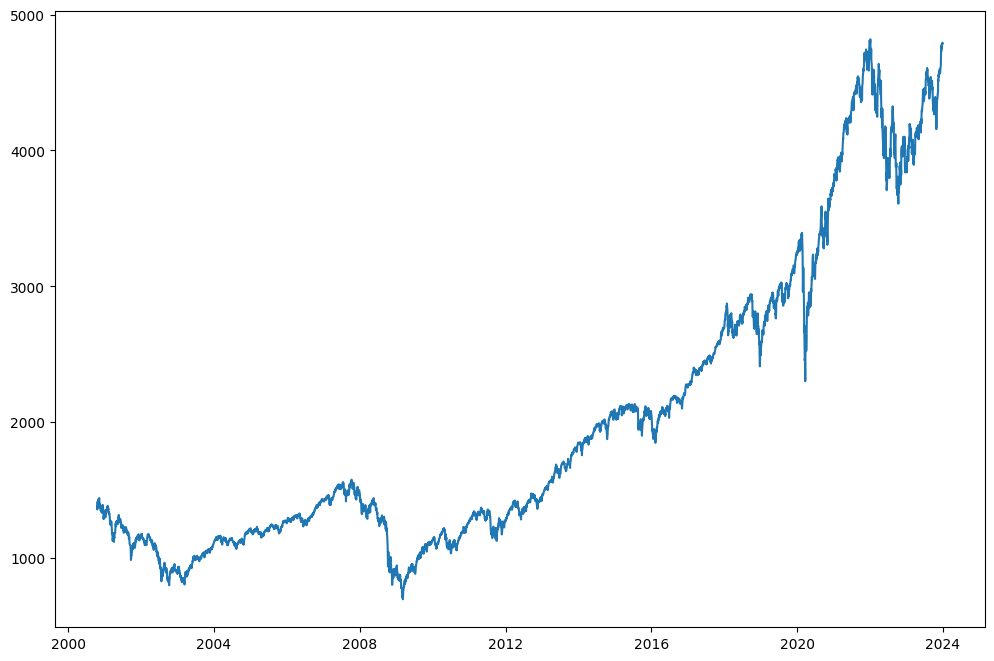

In [238]:
import torch
import torch.nn as nn
import torch.utils.data as data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def getData(df, column, train_end=-250, days_before=7, return_all=True, generate_index=False):
    series = df[column].copy()
    # split data
    train_series, test_series = series[:train_end], series[train_end - days_before:]
    train_data = pd.DataFrame()
        
    # 以七天为一个周期构建数据集和标签
    for i in range(days_before):
        train_data['c%d' % i] = train_series.tolist()[i: -days_before + i]
    # get train labels
    # 获取对应的 label
    train_data['y'] = train_series.tolist()[days_before:]
    # get index
    if generate_index:
        train_data.index = train_series.index[days_before:]
                
    if return_all:
        return train_data, series, df.index.tolist()
    
    return train_data

# build dataloader
# 构建用于模型训练的dataloader
class TrainSet(data.Dataset):
    def __init__(self, data):
        self.data, self.label = data[:, :-1].float(), data[:, -1].float()

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

# build LSTM model
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=64,
            num_layers=1, 
            batch_first=True)
        
        self.out = nn.Sequential(
            nn.Linear(64,1))
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.lstm(x, None)
        out = self.out(r_out[:, -1, :])
        
        return out


train_data, all_series, df_index = getData(merged_data, 'High')

# 获取所有原始数据
all_series = np.array(all_series.tolist())
# 绘制原始数据的图
plt.figure(figsize=(12,8))
plt.plot(df_index, all_series, label='real-data')

# 归一化
train_data_numpy = np.array(train_data)
train_mean = np.mean(train_data_numpy)
train_std  = np.std(train_data_numpy)
train_data_numpy = (train_data_numpy - train_mean) / train_std
train_data_tensor = torch.Tensor(train_data_numpy)

# 创建 dataloader
train_set = TrainSet(train_data_tensor)
train_loader = data.DataLoader(train_set, batch_size=10, shuffle=True)

# Now you can proceed with training your model using train_loader



In [239]:




rnn = LSTM()

if torch.cuda.is_available():
    rnn = rnn.cuda()

# 设置优化器和损失函数
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.0001)
loss_func = nn.MSELoss()

for step in range(100):
    for tx, ty in train_loader:
        
        if torch.cuda.is_available():
            tx = tx.cuda()
            ty = ty.cuda()       
        
        output = rnn(torch.unsqueeze(tx, dim=2))
        loss = loss_func(torch.squeeze(output), ty)
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
    if step % 10==0:
        print(step, loss.cpu())
torch.save(rnn, 'model.pkl')


0 tensor(0.0081, grad_fn=<MseLossBackward0>)
10 tensor(0.0019, grad_fn=<MseLossBackward0>)
20 tensor(0.0008, grad_fn=<MseLossBackward0>)
30 tensor(0.0015, grad_fn=<MseLossBackward0>)
40 tensor(0.0036, grad_fn=<MseLossBackward0>)
50 tensor(0.0035, grad_fn=<MseLossBackward0>)
60 tensor(0.0007, grad_fn=<MseLossBackward0>)
70 tensor(0.0001, grad_fn=<MseLossBackward0>)
80 tensor(0.0007, grad_fn=<MseLossBackward0>)
90 tensor(0.0010, grad_fn=<MseLossBackward0>)


In [240]:
rnn = LSTM()

rnn = torch.load('model.pkl')


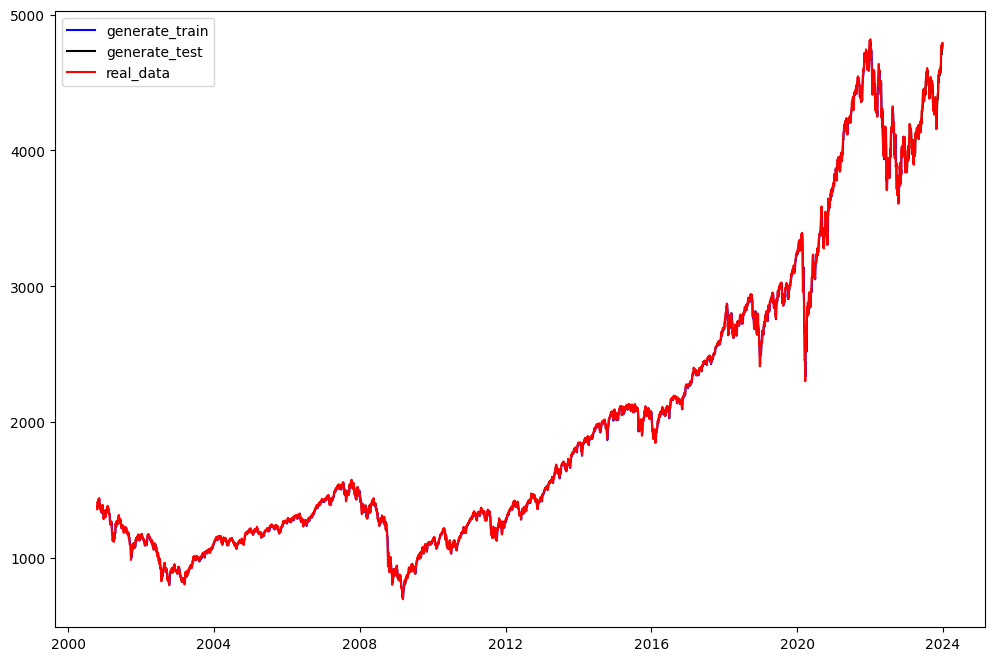

In [243]:
generate_data_train = []
generate_data_test = []

# 测试数据开始的索引
test_start = len(all_series)-250

# 对所有的数据进行相同的归一化
all_series = (all_series - train_mean) / train_std
all_series = torch.Tensor(all_series)

for i in range(7, len(all_series)):
    x = all_series[i - 7:i]
    # 将 x 填充到 (bs, ts, is) 中的 timesteps
    x = torch.unsqueeze(torch.unsqueeze(x, dim=0), dim=2)
    
    if torch.cuda.is_available():
        x = x.cuda()

    y = rnn(x)
    
    if i < test_start:
        generate_data_train.append(torch.squeeze(y.cpu()).detach().numpy() * train_std + train_mean)
    else:
        generate_data_test.append(torch.squeeze(y.cpu()).detach().numpy() * train_std + train_mean)
        
plt.figure(figsize=(12,8))
plt.plot(df_index[7: -250], generate_data_train, 'b', label='generate_train', )
plt.plot(df_index[-250:], generate_data_test, 'k', label='generate_test')
plt.plot(df_index, all_series.clone().numpy()* train_std + train_mean, 'r', label='real_data')
plt.legend()
plt.show()



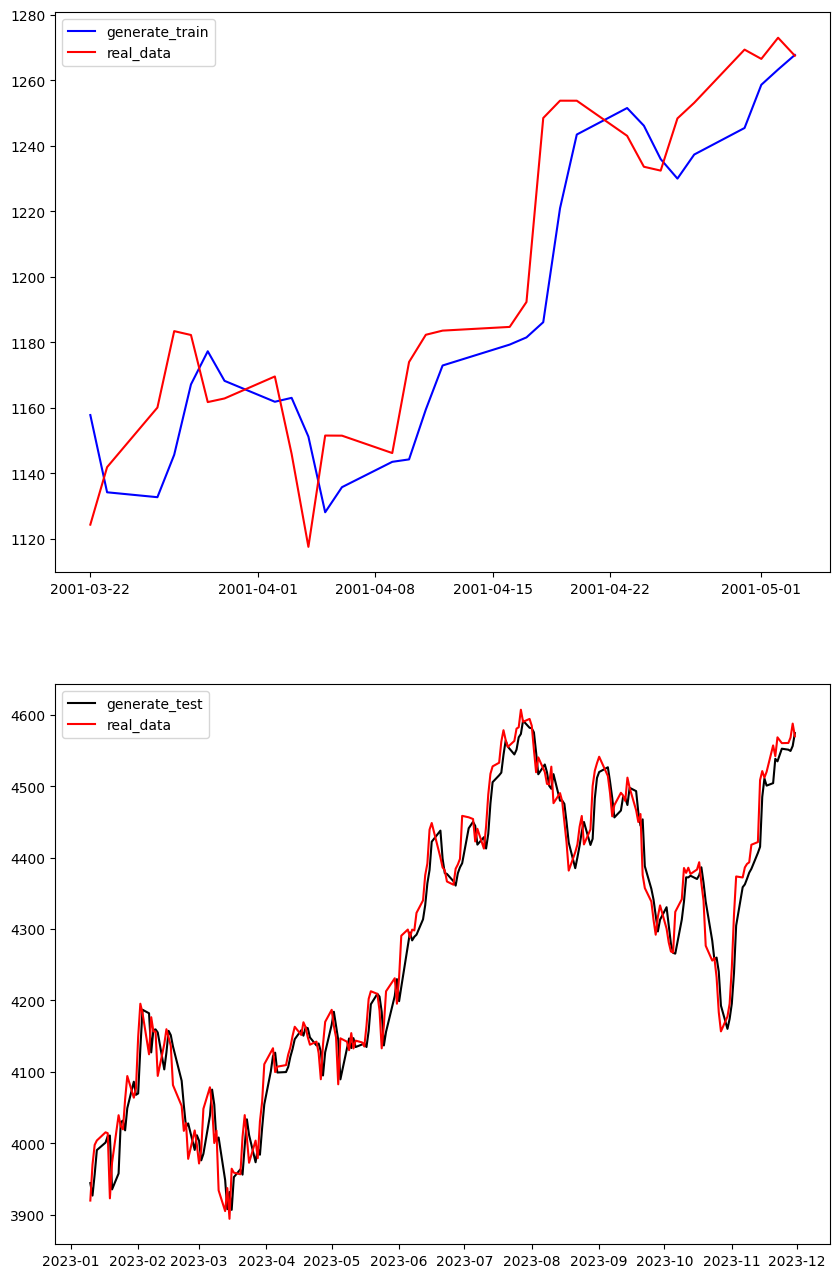

In [244]:
DAYS_BEFORE=7
TRAIN_END=-250

plt.figure(figsize=(10,16))

plt.subplot(2,1,1)
plt.plot(df_index[100 + DAYS_BEFORE: 130 + DAYS_BEFORE], generate_data_train[100: 130], 'b', label='generate_train')
plt.plot(df_index[100 + DAYS_BEFORE: 130 + DAYS_BEFORE], (all_series.clone().numpy()* train_std + train_mean)[100 + DAYS_BEFORE: 130 + DAYS_BEFORE], 'r', label='real_data')
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_index[TRAIN_END + 5: TRAIN_END + 230], generate_data_test[5:230], 'k', label='generate_test')
plt.plot(df_index[TRAIN_END + 5: TRAIN_END + 230], (all_series.clone().numpy()* train_std + train_mean)[TRAIN_END + 5: TRAIN_END + 230], 'r', label='real_data')
plt.legend()
plt.show()


tensor([-1.1526, -1.1744, -1.1732,  ...,  1.6265,  1.6409,  1.6320])